# 0.0. Imports

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns

## 0.1. Helper Functions

In [226]:
# pandas and numpy adj to supress scientific notation
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 0.2. Loading Data

In [227]:
data = pd.read_csv('kc_house_data.csv')

# 1.0. Data Description

## 1.2. Data Dimension

In [228]:
# number of rows and columns
print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

Number of rows: 21613
Number of columns: 21


## 1.3. Data Types

In [229]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4. Change Types

In [230]:
# changing date to datetime data type
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# changing bathrooms and floors data types from floats to ints
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors'] = data['floors'].astype('int64')

In [231]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.4. Check NA

In [232]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.6. Data Cleaning

In [233]:
# the only house with 33 bedrooms seem to be a typo, so we are changing it to 3 bedrooms
data.loc[data['bedrooms'] == 33, 'bedrooms'] = 3

# we are assuming that the duplicate id's are a typo, so we are going to drop them
data.drop_duplicates(subset=['id'], keep='first', inplace=True)

# 2.0. Descriptive Statistics

In [234]:
# selecting only numerical data
num_attributes = data.select_dtypes(include=['int64', 'float64'])

# dropping columns with info that, for now, are not important
num_attributes.drop(['id', 'zipcode', 'lat', 'long'], axis = 1, inplace = True)
num_attributes

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.00,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.00,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.00,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062
3,604000.00,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.00,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.00,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.00,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.00,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,1410,1287


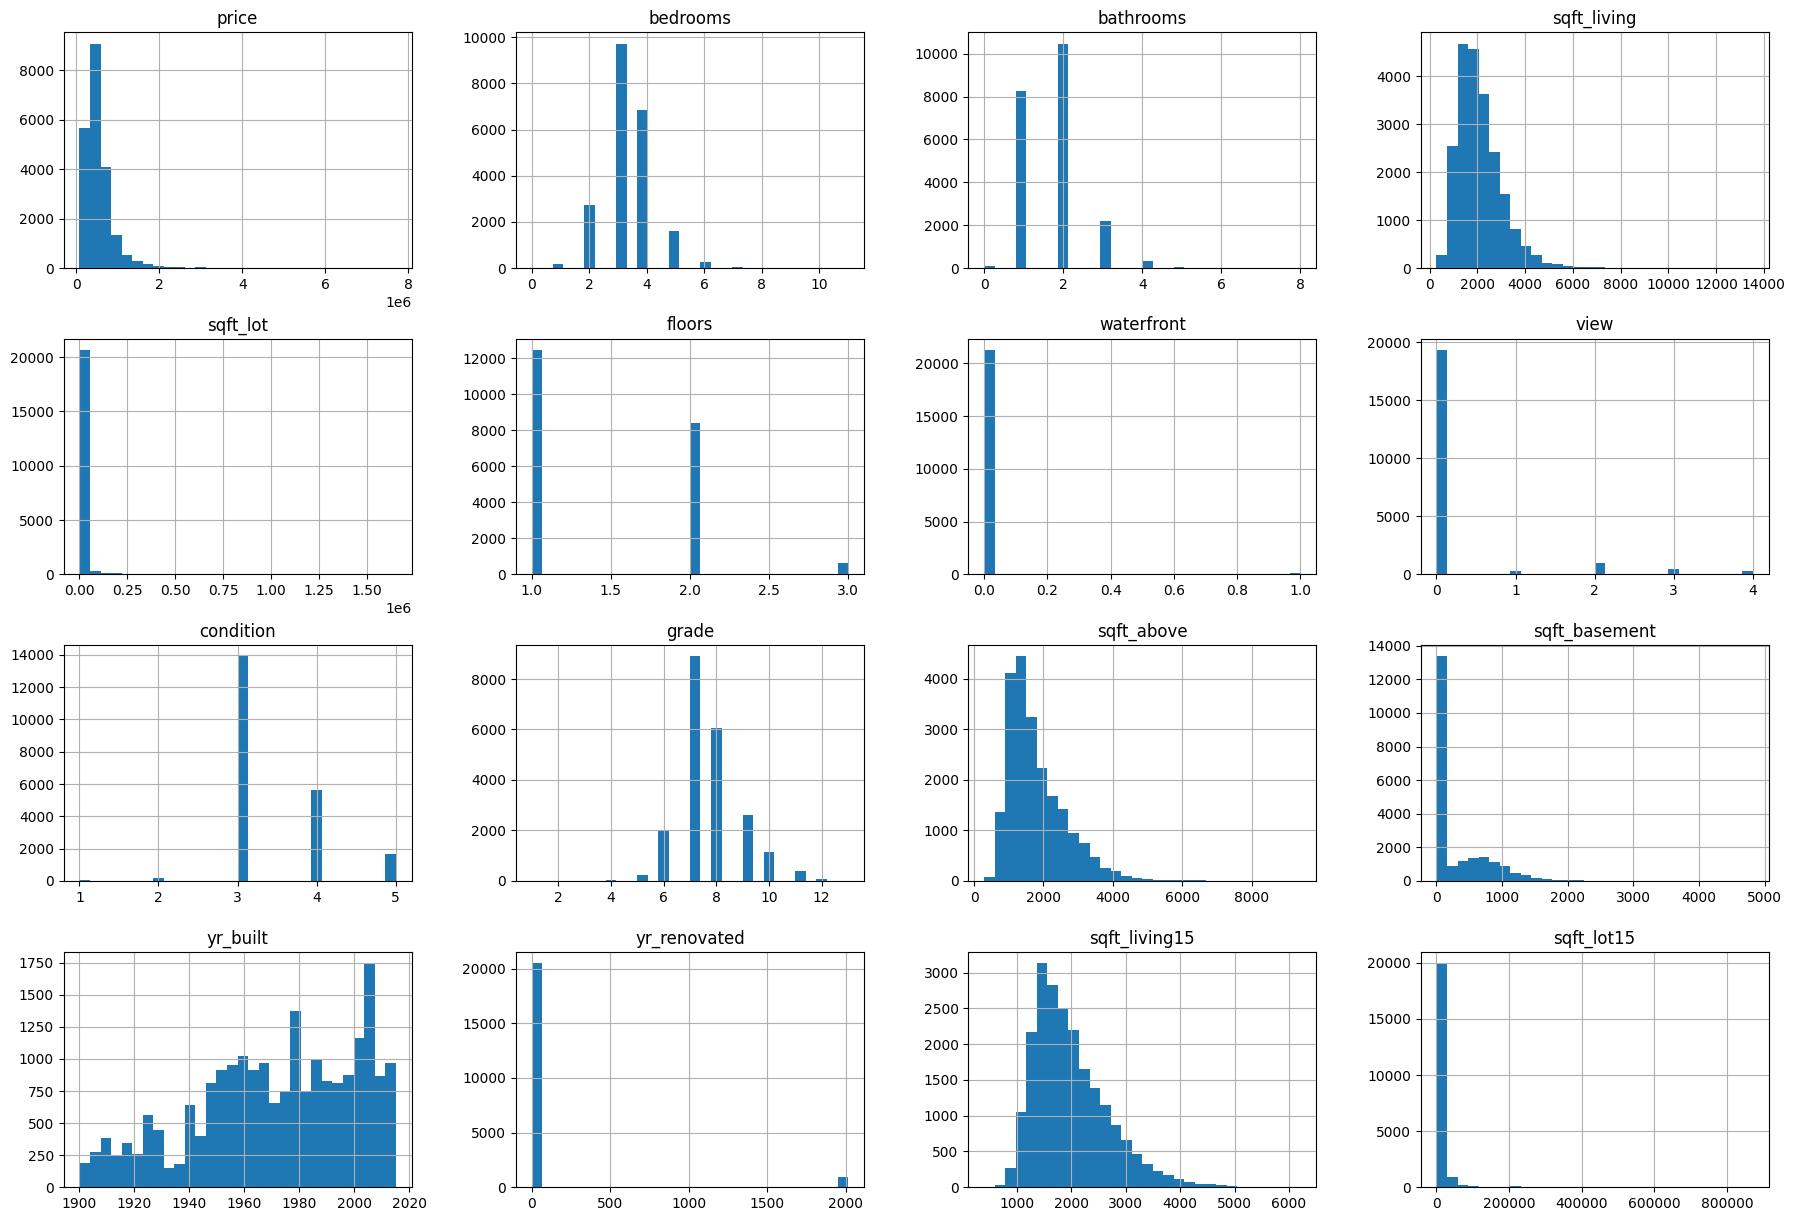

In [235]:
num_attributes.hist(bins= 30, figsize = (22,15));

In [236]:
# central tendency
mean = pd.DataFrame(num_attributes.apply(np.mean))
median = pd.DataFrame(num_attributes.apply(np.median))

# dispersion
std = pd.DataFrame(num_attributes.apply(np.std))
max_ = pd.DataFrame(num_attributes.apply(np.max))
min_ = pd.DataFrame(num_attributes.apply(np.min))

# concatenating central tendency and dispersion dataframes
df = pd.concat([max_, min_, mean, median, std], axis=1).reset_index()
df.columns = ['attributes', 'maximum', 'minimum', 'mean', 'mean', 'std']
df

,attributes,maximum,minimum,mean,mean,std
0,price,7700000.00,75000.00,540529.29,450000.00,367680.72
1,bedrooms,11.00,0.00,3.37,3.00,0.91
2,bathrooms,8.00,0.00,1.75,2.00,0.73
3,sqft_living,13540.00,290.00,2082.70,1920.00,919.13
4,sqft_lot,1651359.00,520.00,15135.64,7614.00,41537.65
5,floors,3.00,1.00,1.45,1.00,0.55
6,waterfront,1.00,0.00,0.01,0.00,0.09
7,view,4.00,0.00,0.24,0.00,0.77
8,condition,5.00,1.00,3.41,3.00,0.65
9,grade,13.00,1.00,7.66,7.00,1.17


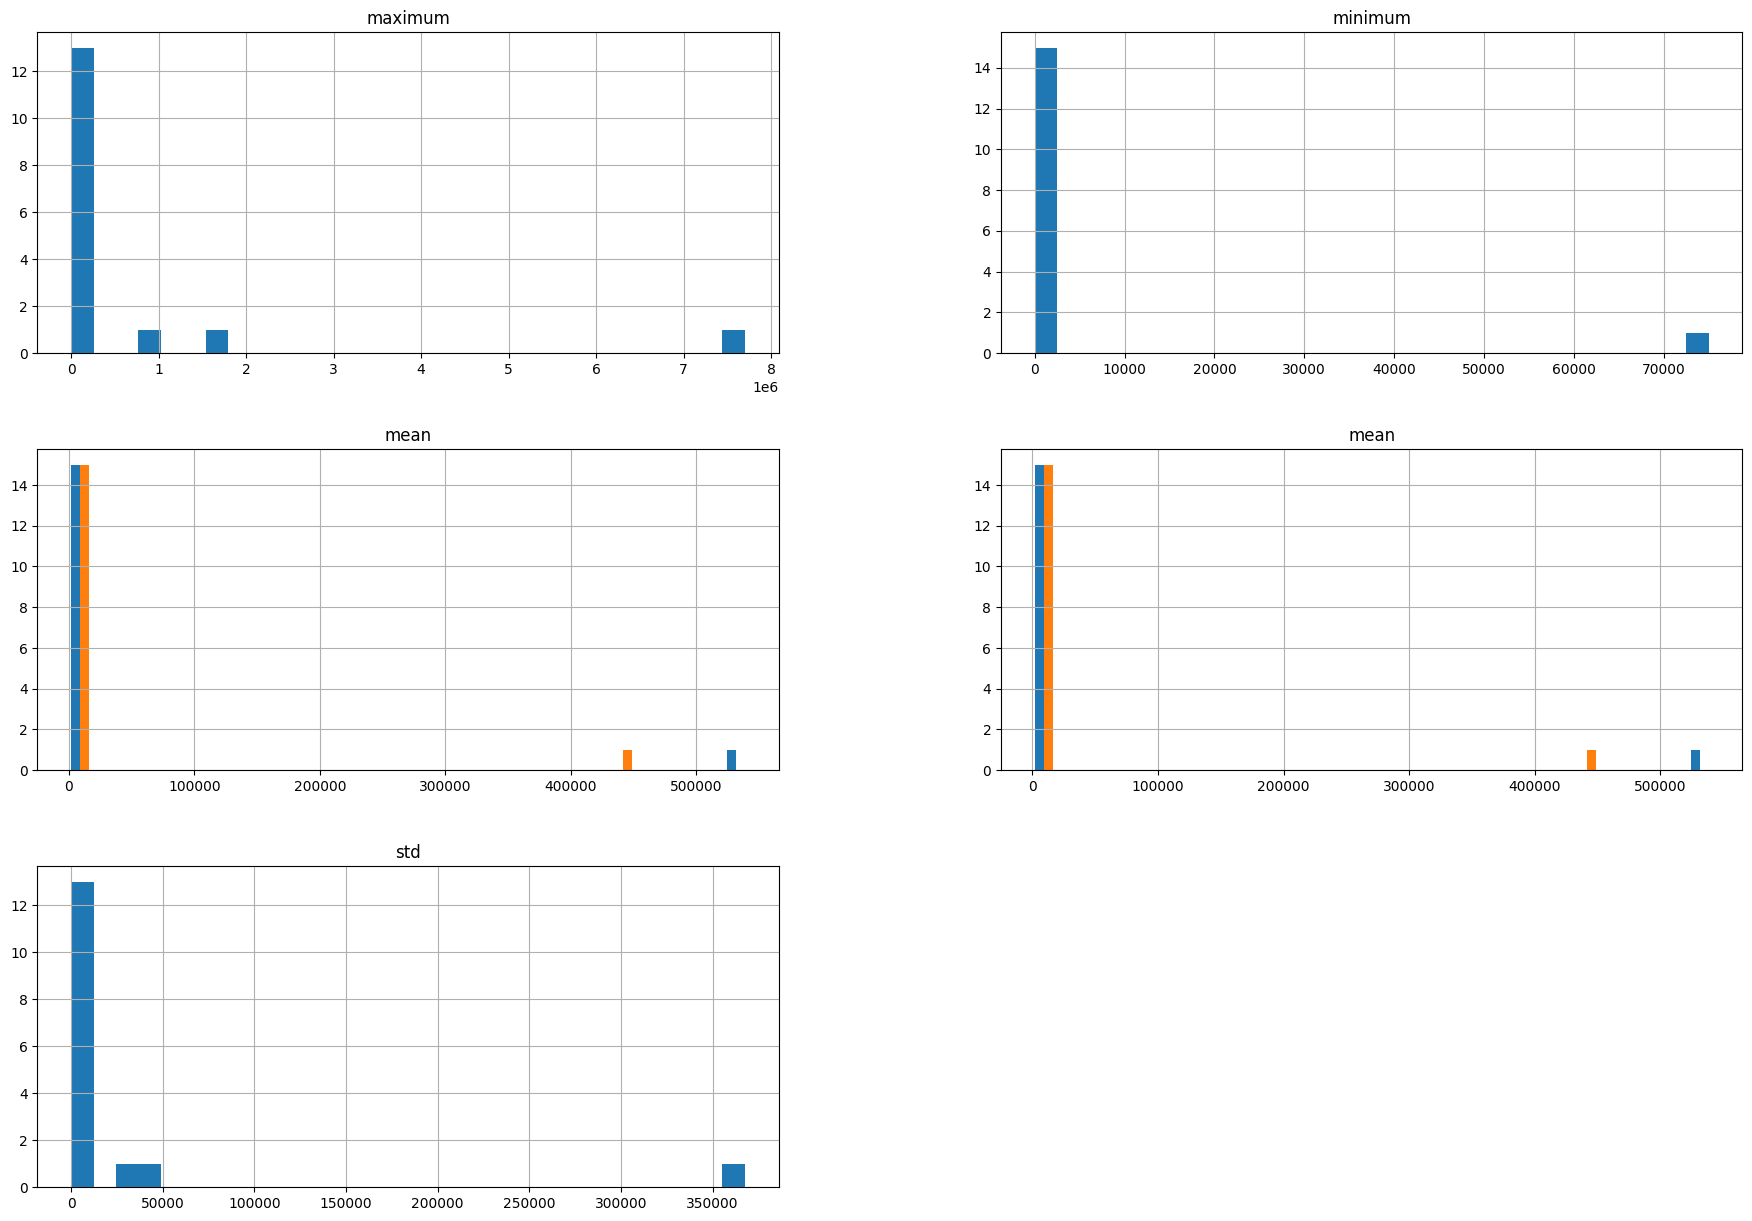

In [237]:
# visualizing central tendency and dispersion info with histograms
df.hist(bins = 30, figsize = (22,15));

# 3.0. Hypothesis

## 3.1. Hypothesis Creation

- H1: The average price of properties that have a water view are, at least, 30% higher.

- H2: The average price of properties built before 1955 is, at least, 50% cheaper.

- H3: Properties without basements have a total area of space 50% larger than properties with basements.

- H4: Real estate YoY price have increased in 10%.

- H5: Properties with 3 bathrooms have a MoM growth of 15%.

- H6: The average price fluctuates by 20% between property conditions.

- H7: Properties that never went through renovations are, at least, 40% cheaper.

- H8: Properties with bad view are at least 20% cheaper than those with good view.

- H9: Between summer and spring, an increase of 20% of the prices of these properties is expected.

- H10: Overall, there is a devaluation of these properties during winter time.

## 3.2. Data Manipulation and Hypothesis Testing

In [238]:
# create column 'bb_1955' (built before 1955)
data['bb_1955'] = data['yr_built'].apply(lambda x: 'yes' if x < 1955 else 'no')

In [239]:
# create column 'basement'
data['basement'] = data['sqft_basement'].apply(lambda x: 'no' if x == 0 else 'yes')

In [240]:
# create column 'year'
data['year'] = data['date'].dt.year

In [241]:
# create column 'month'
data['month'] = data['date'].dt.month

In [242]:
# create column 'condition_type'
data['condition_type'] = data['condition'].apply(lambda x: 'bad' if x <=2 else
                                                'regular' if (x == 3) | (x == 4) else 'good')

In [243]:
# create column 'renovation'
data['renovation'] = data['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')

In [244]:
# create column 'view_type'
data['view_type'] = data['view'].apply(lambda x: 'null' if x == 0 else 
                                        'bad' if x == 1 else 
                                        'good' if (x == 2) | (x == 3) else 'excellent')

In [245]:
# create column 'seasons'
data['seasons'] = data['month'].apply(lambda x: 'spring' if (x >= 3) & (x <= 5) else
                                                'summer' if (x >= 6) & (x <= 8) else
                                                'autumn' if (x >= 9) & (x <= 11) else
                                                'winter')

### H1: The average price of properties that have a water view are, at least, 30% higher.
**True**: properties with water view have their average price 30% higher



In [246]:
h1 = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
h1

,waterfront,price
0,0,531937.20
1,1,1661876.02


In [247]:
h1['price'].pct_change()*100

0      NaN
1   212.42
Name: price, dtype: float64

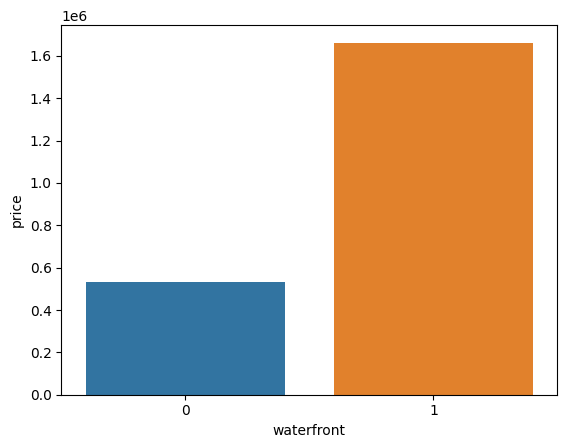

In [248]:
h1['waterfront'] = h1['waterfront'].astype(str)
ax = sns.barplot(x = 'waterfront', y = 'price', data = h1);


### H2: The average price of properties built before 1955 is, at least, 50% cheaper.
**False**: the average prices of properties built before and after 1955 are very close (with a difference of 0.62%)

In [249]:
h2 = data[['bb_1955', 'price']].groupby('bb_1955').mean().reset_index()
h2

,bb_1955,price
0,no,541478.25
1,yes,538139.13


In [250]:
h2['price'].pct_change()*100

0     NaN
1   -0.62
Name: price, dtype: float64

[]

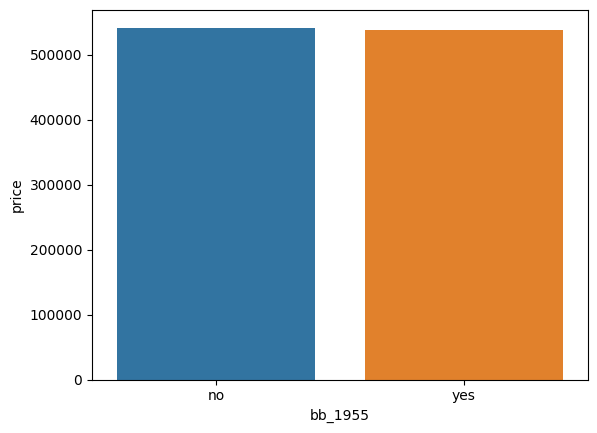

In [251]:
ax = sns.barplot(data = h2, x = 'bb_1955', y = 'price')
ax.set()

### H3: Properties without basements have a total area of space 50% larger than properties with basements.

**False**: properties without basements are only 22.79% larger.

In [252]:
h3 = data[['basement', 'sqft_lot']].groupby('basement').mean().sort_values('sqft_lot', ascending = True).reset_index()
h3

,basement,sqft_lot
0,yes,13295.99
1,no,16325.93


In [253]:
h3['sqft_lot'].pct_change()*100

0     NaN
1   22.79
Name: sqft_lot, dtype: float64

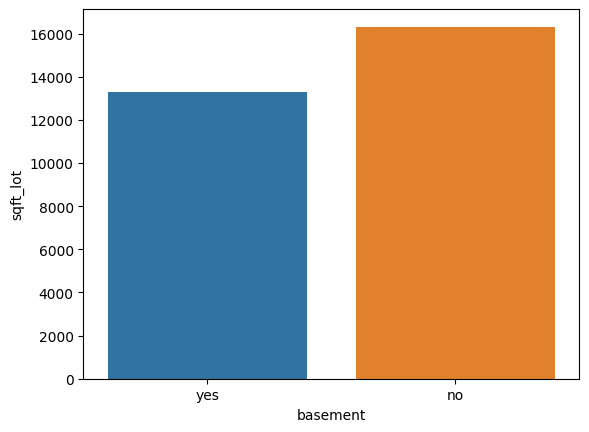

In [254]:
sns.barplot(x = 'basement', y = 'sqft_lot', data=h3);

### H4: Real estate YoY price have increased in 10%.
**False**: real estate has depreciated in 52.84% between 2014 and 2015.

In [255]:
h4 = data[['price', 'year']].groupby('year').sum().reset_index()
h4

,year,price
0,2014,7873554445.00
1,2015,3713231355.00


In [256]:
h4['price'].pct_change()*100

0      NaN
1   -52.84
Name: price, dtype: float64

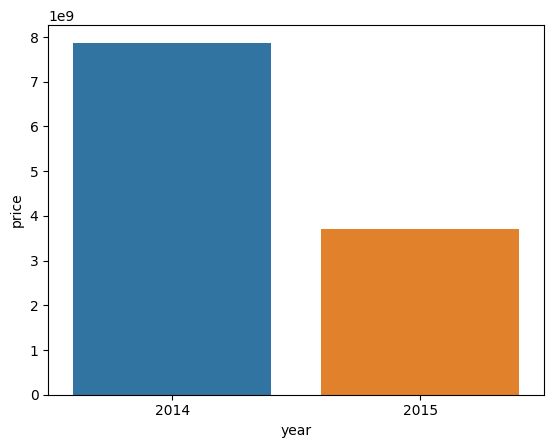

In [257]:
h4['year'] = h4['year'].astype(str)
sns.barplot(x = 'year', y = 'price', data = h4);

### H5: Real estate with 3 bathrooms have a MoM growth of 15%.
**False**: after the first 5 months of the year, the price of these properties is lower.

In [258]:
h5 = data.loc[data['bathrooms'] == 3]
h5 = h5[['month', 'price']].groupby('month').sum().reset_index()
h5

,month,price
0,1,91709700.00
1,2,89456635.00
2,3,171658396.00
3,4,208663483.00
4,5,224969430.00
5,6,215230485.00
6,7,189876547.00
7,8,177331512.00
8,9,164948513.00
9,10,182095856.00


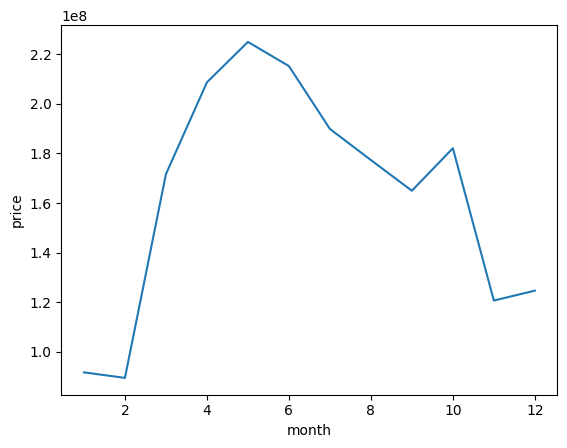

In [259]:
sns.lineplot(x = 'month', y = 'price', data = h5, markers = True);

### H6: The average price fluctuates by 20% between property conditions.
**False**: properties in the conditions 1 and 2 have similar average prices, the same can be said about properties 3 and 4.

In [260]:
h6 = data[['price', 'condition']].groupby('condition').mean().sort_values('condition'). reset_index()
h6

,condition,price
0,1,330618.97
1,2,324661.21
2,3,542625.33
3,4,521470.88
4,5,611611.93


In [261]:
h6['price'].pct_change()*100

0     NaN
1   -1.80
2   67.14
3   -3.90
4   17.29
Name: price, dtype: float64

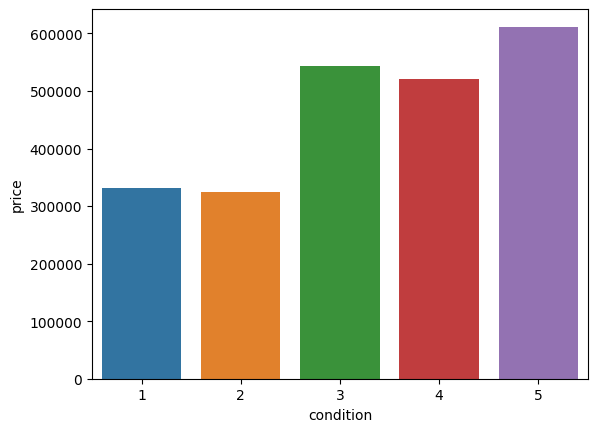

In [262]:
sns.barplot(x = 'condition', y = 'price', data = h6);

### H7: Properties that never went through renovations are, at least, 40% cheaper.
**True**: properties without any renovation are 40% cheaper. 

In [263]:
h7 = data[['renovation', 'price']].groupby('renovation').mean().reset_index()

In [264]:
h7['price'].pct_change()*100

0     NaN
1   43.52
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='renovation'>

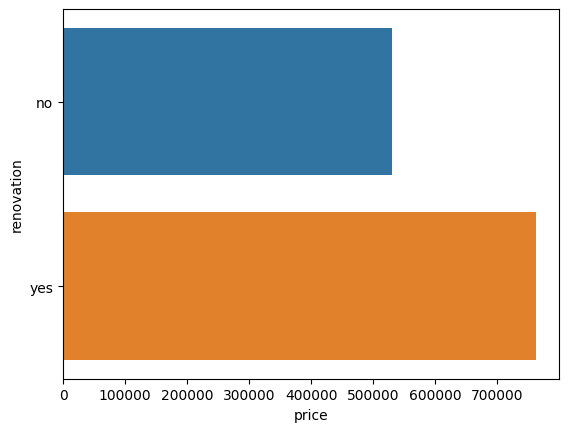

In [265]:
sns.barplot(x = 'price', y = 'renovation', data = h7)

### H8: Properties with bad view are at least 20% cheaper than those with good view.
**False**: the difference of prices between these properties are minimum (5.13%).

In [266]:
h8 = data[['view_type', 'price']].groupby('view_type').mean().sort_values('price', ascending = True).reset_index()
h8

,view_type,price
0,null,496869.45
1,bad,812778.66
2,good,854492.41
3,excellent,1465154.70


In [267]:
h8['price'].pct_change()*100

0     NaN
1   63.58
2    5.13
3   71.46
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='view_type'>

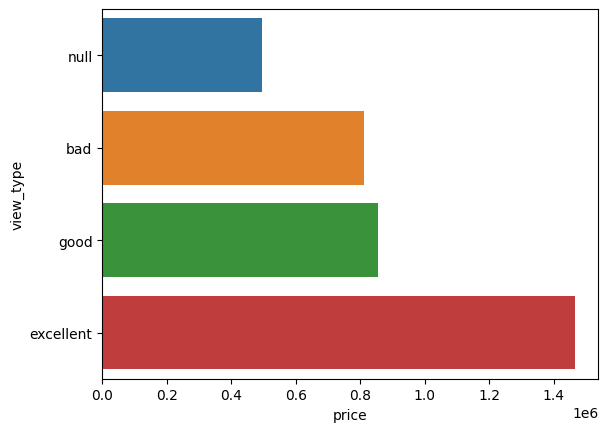

In [268]:
sns.barplot(x = 'price', y = 'view_type', data = h8)

### H9: Between summer and spring, an increase of 20% of the prices of these properties is expected.
**False**: the difference of the prices between summer and spring are minimal (2.78%).

In [269]:
h9 = data[['seasons', 'price']].groupby('seasons').sum().sort_values('price', ascending = True).reset_index()
aux = h9.loc[(h9['seasons'] == 'summer') | (h9['seasons'] == 'spring')]

In [270]:
aux['price'].pct_change()*100

2    NaN
3   2.78
Name: price, dtype: float64

<AxesSubplot: xlabel='seasons', ylabel='price'>

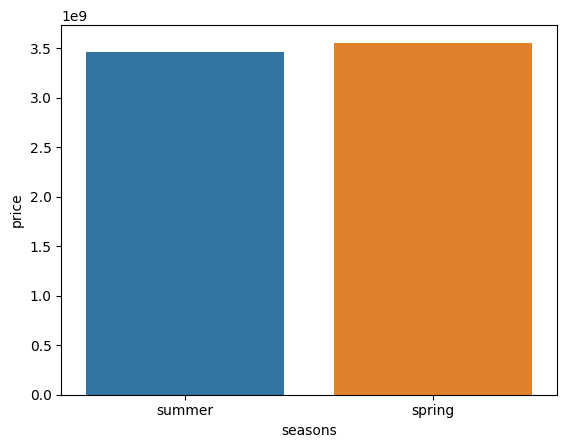

In [271]:
sns.barplot(x = 'seasons', y = 'price', data = aux)

### H10: Overall, there is a devaluation of these properties during winter time.
**True**: it would be ideal to buy properties during winter to sell during spring or summer. 

In [272]:
h10 = data[['seasons', 'price']].groupby('seasons').sum().sort_values('price', ascending = True).reset_index()

In [273]:
h10['price'].pct_change()*100

0     NaN
1   41.87
2   28.98
3    2.78
Name: price, dtype: float64

<AxesSubplot: xlabel='seasons', ylabel='price'>

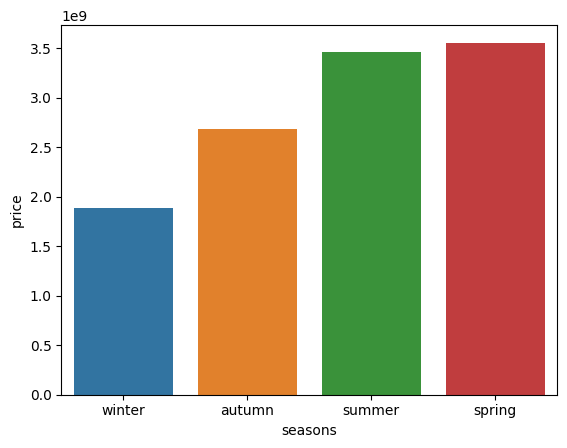

In [274]:
sns.barplot(x = 'seasons', y = 'price', data = h10)

# 4.0. Answering The Business Questions

### 1. Which properties should House Rocket buy and for what price?

1. We will group all data by zipcode;

2. In which we will find the median price of the properties;

3. Then we will suggest that those properties that are below the median price in each region and are in acceptable condition for acquisition.

In [294]:
df = data.copy()

In [301]:
df1 = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df2 = pd.merge(df1, df, on='zipcode', how = 'inner')
df2 = df2.rename(columns = {'price_y' : 'price', 'price_x' : 'median'} )

for i, row in df2.iterrows():
    if (row['median'] >= row['price']) & (row['condition'] < 3):
        df2.loc[i,'pay'] =  'yes'
    else:
        df2.loc[i, 'pay'] = 'no'
        
# Properties to buy
to_buy = df2[df2['pay'] == 'yes']

to_buy['pay'].shape[0]
to_buy[['id', 'price', 'pay']]

,id,price,pay
0,7895500070,240000.00,yes
103,5706600170,204900.00,yes
229,3599600276,215500.00,yes
605,5152600090,235500.00,yes
1089,2425700022,425000.00,yes
...,...,...,...
20187,1670400090,182000.00,yes
20612,7812800155,170000.00,yes
20657,1180002580,180000.00,yes
21015,7686205370,260000.00,yes


In [326]:
# exporting csv file
to_buy.to_csv('to_buy.csv', index=False)

### 2. Once the properties are acquired, when is the best time to sell them, and for what price?
1. Group the properties by zipcode and by seasonality, and then we will calculate the median prices;

2. To finish, we will make our choices based on the following sales conditions:
- If the purchase price is greater than the median of the region + seasonality.

**The sales price will be equal to the purchase price + 10%**.

- If the bid price is lower than the region's median + seasonality.

**The sales price will be equal to the purchase price + 30%**.

In [306]:
df3 = df2.copy()

In [309]:
df3 = df3[df3['pay'] == 'yes']
df4 = df3[['seasons', 'zipcode', 'price']].groupby(['zipcode', 'seasons']).median().reset_index()
df4 = df4.rename(columns = {'price' : 'median_season', 'seasons': 'season_median'} ) 
df5 = pd.merge(df3, df4, on='zipcode', how = 'inner')

for i, row in df5.iterrows():
    if (row['median_season'] > row['price']):
        df5.loc[i, 'sale'] =  row['price'] * 1.1
    else:
        df5.loc[i, 'sale'] = row['price'] * 1.3

In [317]:
to_sell = df5[['seasons', 'price', 'id', 'sale']]
to_sell

,seasons,price,id,sale
0,winter,240000.00,7895500070,312000.00
1,winter,240000.00,7895500070,312000.00
2,winter,240000.00,7895500070,312000.00
3,spring,204900.00,5706600170,225390.00
4,spring,204900.00,5706600170,266370.00
...,...,...,...,...
396,spring,180000.00,1180002580,234000.00
397,autumn,260000.00,7686205370,338000.00
398,autumn,260000.00,7686205370,338000.00
399,winter,235000.00,7205400180,258500.00


<AxesSubplot: xlabel='seasons', ylabel='sale'>

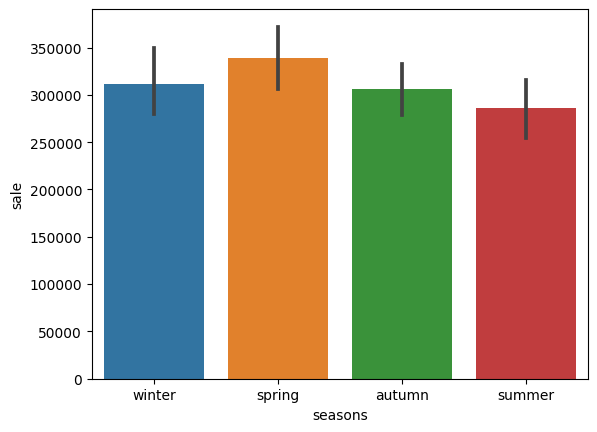

In [318]:
sns.barplot(x = 'seasons', y = 'sale', data = to_sell)

In [325]:
# exporting csv file
to_sell.to_csv('to_sell.csv', index=False)

# 5.0. How much it is possible to profit from these insights?
It is possible to achieve a total profit of **US$ 24222890.20**


In [327]:
df5['profit'] = df5['sale'] - df5['price']
profit = df5['profit'].sum()
print('total profit: US$ {:.2f}'.format(profit))

total profit: US$ 24222890.20
